In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

from src.constants import ALL_COLS, LABEL
from src.ETL_class import DataTransformer
from src.NN_model_class import Model

# Single train run

In [5]:
raw_df = pd.read_csv('data_raw/train.csv')
X = raw_df[ALL_COLS]; y = raw_df[LABEL]
data_transform = DataTransformer(all_cols=ALL_COLS)

In [6]:
pipe = Pipeline([
    ("data_tranformer", data_transform),
    ("model", Model())
])

pipe.fit(X, y)


Pipeline(steps=[('data_tranformer',
                 DataTransformer(all_cols=['T_min', 'T_mean', 'T_max', 'P_min',
                                           'P_mean', 'P_max', 'U_min', 'U_mean',
                                           'U_max', 'Ff_min', 'Ff_mean',
                                           'Ff_max', 'N_min', 'N_mean', 'N_max',
                                           'VV_min', 'VV_mean', 'VV_max',
                                           'RRR_min', 'RRR_mean', 'RRR_max'])),
                ('model',
                 Model(
  (nll_loss): NLLLoss()
  (lin_1): Linear(in_features=31, out_features=64, bias=True)
  (gelu_1): GELU(approximate='none')
  (lin_2): Linear(in_features=64, out_features=2, bias=True)
  (m): LogSoftmax(dim=1)
))])

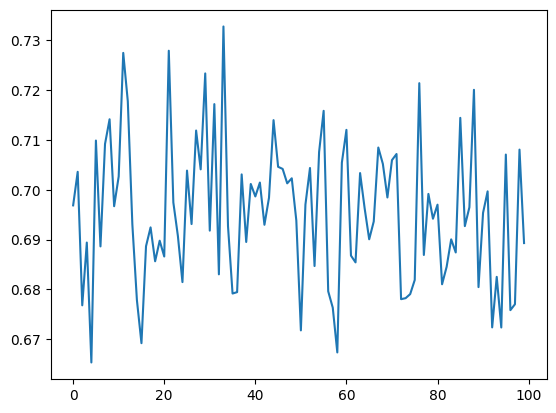

In [7]:
plt.plot(pipe.named_steps['model'].all_losses, label='train')

# CV

In [2]:
raw_df = pd.read_csv('data_raw/train.csv')
X = raw_df[ALL_COLS]; y = raw_df[LABEL]
data_transform = DataTransformer(all_cols=ALL_COLS)

pipe = Pipeline([
    ("data_tranformer", data_transform),
    ("model", Model())
])

In [3]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
test_res = cross_validate(pipe,
                          X=X,
                          y=y,
                          cv=kfold,
                          error_score='raise')
test_res['test_score'].mean()


/Users/igorchebuniaev/.local/share/virtualenvs/RL_in_ksp--361CVkw/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Seems like `optimizer.step()` has been overridden after learning rate scheduler "
/Users/igorchebuniaev/.local/share/virtualenvs/RL_in_ksp--361CVkw/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Seems like `optimizer.step()` has been overridden after learning rate scheduler 

0.6887776414553325

In [4]:
test_res['test_score']

array([0.6940574 , 0.72322345, 0.67294776, 0.65692836, 0.68006438,
       0.65431529, 0.70500797, 0.66928738, 0.67300379, 0.72435224,
       0.70010954, 0.69720817, 0.68988478, 0.68832505, 0.70294905])

# Test

In [26]:
test_df = pd.read_csv('data_raw/test.csv').fillna(0)
# raw_test = torch.tensor(test_df[ALL_COLS].values, dtype=torch.float32)
submit_df = test_df[['Id']].copy()

In [29]:
submit_df.loc[:, 'y'] = pipe.predict(test_df).reshape(-1,1).detach().numpy()

In [30]:
submit_df.to_csv('data_submissions/4th_submit.csv', index=False)